# Import module

In [1]:
import yfinance as yf
import mplfinance as mpf
import pandas as pd

In [2]:
data = yf.download("BTC-USD", start="2019-01-01" ,period="1d") 

data['MA20'] = data['Close'].rolling(window=20).mean()
data['MA120'] = data['Close'].rolling(window=120).mean()

data['MA20_above_MA120'] = data['MA20'] > data['MA120']
data['MA20_cross_MA120'] = data['MA20_above_MA120'].diff()
data['previous_MA20_above_MA120'] = data['MA20_above_MA120'].shift(1)

buy_signals = data[((data['previous_MA20_above_MA120'] == False) & (data['MA20_above_MA120'] == True))]
sell_signals = data[((data['previous_MA20_above_MA120'] == True) & (data['MA20_above_MA120'] == False))]

[*********************100%***********************]  1 of 1 completed


   index     Buy on    Sell on        Buy at       Sell at           %
0      0 2019-04-30 2019-09-24   5350.726562   8620.566406  161.110203
1      1 2020-01-20 2020-03-14   8657.642578   5200.366211   60.066769
2      2 2020-05-07 2021-05-21   9951.518555  37304.691406  374.864310
3      3 2021-08-13 2021-12-12  47793.320312  50098.335938  104.822882
4      4 2022-04-01 2022-04-22  46281.644531  39740.320312   85.866267
5      5 2023-01-19 2023-06-15  21086.792969  25576.394531  121.291059
6      6 2023-06-24 2023-08-22  30548.695312  26031.656250   85.213643
7      7 2023-10-23 2024-06-25  33086.234375  61804.640625  186.798654
8      8 2024-07-31 2024-08-06  64619.250000  56034.316406   86.714588


d:\Github\training-for-trade\.venv\lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


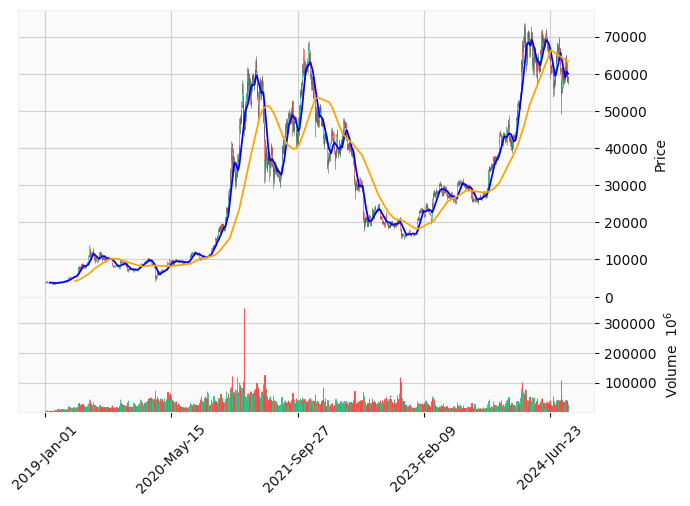

In [6]:
buy_signals = buy_signals.rename(columns={'index': 'date'})
buy_signals = buy_signals.reset_index()
sell_signals = sell_signals.rename(columns={'index': 'date'})
sell_signals = sell_signals.reset_index()

result_table = buy_signals.merge(how="inner", on="index", right=sell_signals)
result_table['%'] = result_table['Close_y'] / result_table['Close_x'] * 100
# # Display the table
res = result_table[["index", "Date_x", "Date_y", "Close_x", "Close_y", "%"]]
res = res.rename(columns={'Date_x': 'Buy on', 'Date_y': 'Sell on', 'Close_x': 'Buy at', 'Close_y': 'Sell at'})
print(res)

res.to_csv('Last_results_tables.csv')

# Plot the candlestick chart with moving averages
apds = [
    mpf.make_addplot(data['MA20'], type='line', color='blue'),
    mpf.make_addplot(data['MA120'], type='line', color='orange')
]

mpf.plot(data, type='candle', volume=True, style='yahoo', addplot=apds)